In [27]:
import numpy as np
import pandas as pd
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl
from math import *
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("StudentsPerformance.csv")

# Descriptive Statistics

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

### Comparison of all features related to math grades

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=2.01E+03'}, xlabel='reading score', ylabel='math score'>,
         <AxesSubplot:title={'center':'F=1.81E+03'}, xlabel='writing score'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=3.73E-02'}, xlabel='math score', ylabel='gender'>,
         <AxesSubplot:title={'center':'F=3.69E-02'}, xlabel='math score', ylabel='race/ethnicity'>,
         <AxesSubplot:title={'center':'F=2.87E-02'}, xlabel='math score', ylabel='parental level of...'>,
         <AxesSubplot:title={'center':'F=1.02E-02'}, xlabel='math score', ylabel='lunch'>,
         <AxesSubplot:title={'center':'F=7.79E-03'}, xlabel='math score', ylabel='test preparation ...'>]],
       dtype=object)]

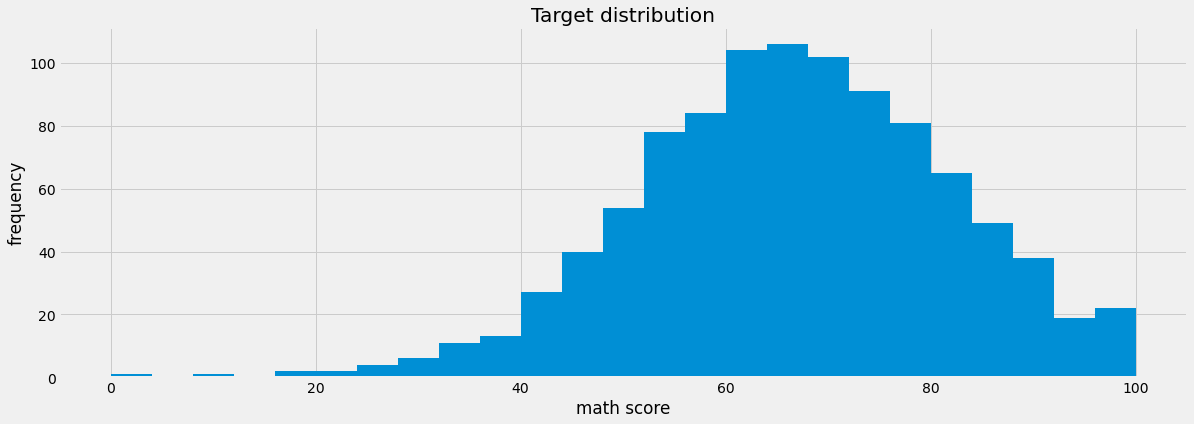

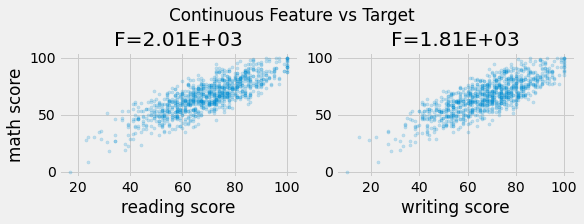

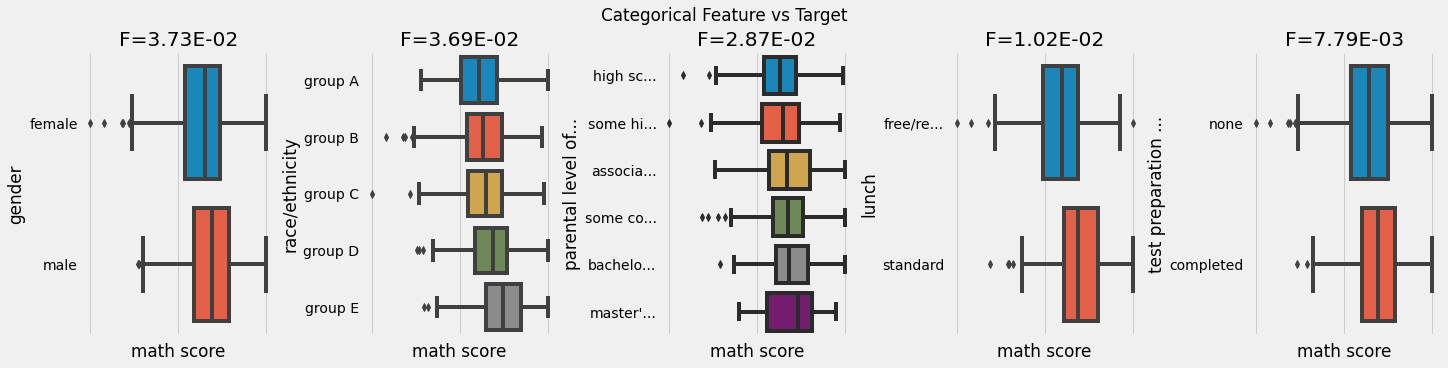

In [10]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col = 'math score')

### Comparison of all features related to reading grades

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=1.02E+04'}, xlabel='writing score', ylabel='reading score'>,
         <AxesSubplot:title={'center':'F=2.01E+03'}, xlabel='math score'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=6.33E-02'}, xlabel='reading score', ylabel='gender'>,
         <AxesSubplot:title={'center':'F=3.84E-02'}, xlabel='reading score', ylabel='race/ethnicity'>,
         <AxesSubplot:title={'center':'F=1.36E-02'}, xlabel='reading score', ylabel='parental level of...'>,
         <AxesSubplot:title={'center':'F=2.25E-03'}, xlabel='reading score', ylabel='lunch'>,
         <AxesSubplot:title={'center':'F=1.66E-03'}, xlabel='reading score', ylabel='test preparation ...'>]],
       dtype=object)]

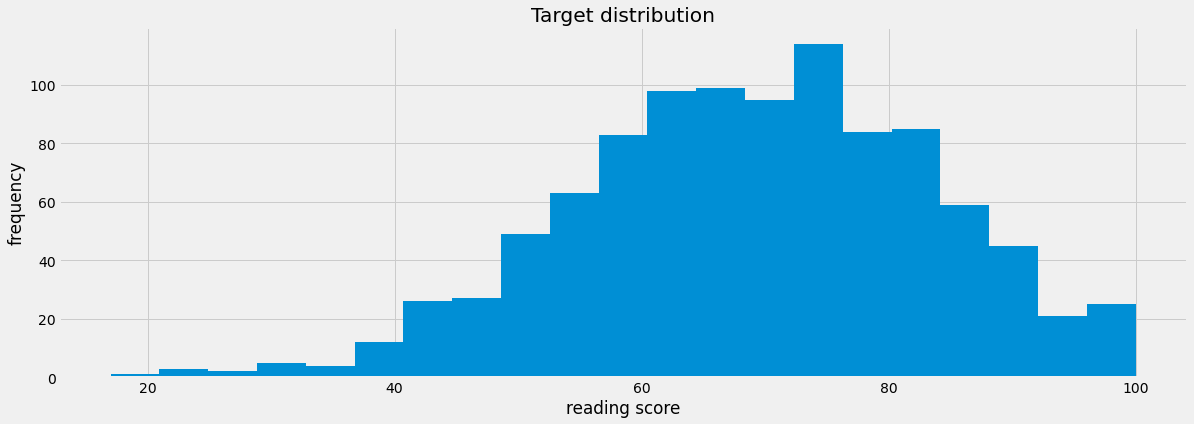

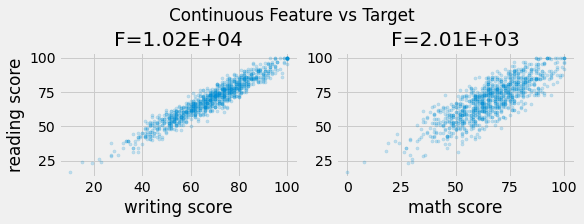

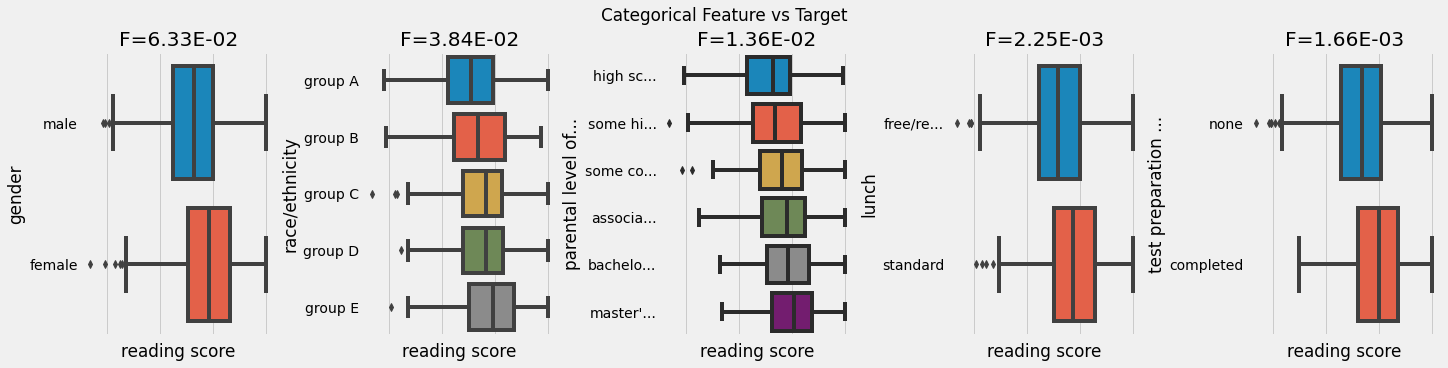

In [11]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col = 'reading score')

### Effect of Lunch on Student’s Performnce

In [12]:
df[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('mean')

math score  writing score  reading score
lunch        gender                                          
free/reduced female   55.814815      66.444444      67.386243
             male     62.457831      59.126506      61.542169
standard     female   68.124620      75.927052      75.607903
             male     72.022152      65.509494      67.537975

In [13]:
df[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

### Effect of Test Preparation Course on Scores

In [14]:
df[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('mean')

math score  writing score  reading score
test preparation course gender                                          
completed               female   67.195652      78.793478      77.375000
                        male     72.339080      69.793103      70.212644
none                    female   61.670659      68.982036      69.982036
                        male     66.688312      59.649351      62.795455

In [15]:
df[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

# Data Visualizations

### Visualizing the number of male and female in the data set

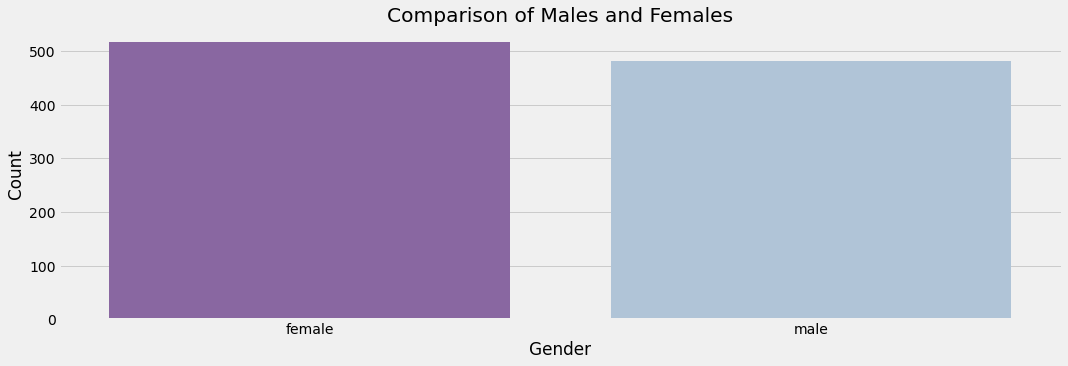

In [16]:
plt.rcParams['figure.figsize'] = (16, 5)
sns.countplot(df['gender'], palette = 'BuPu_r')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Visualizing the different groups in the data set

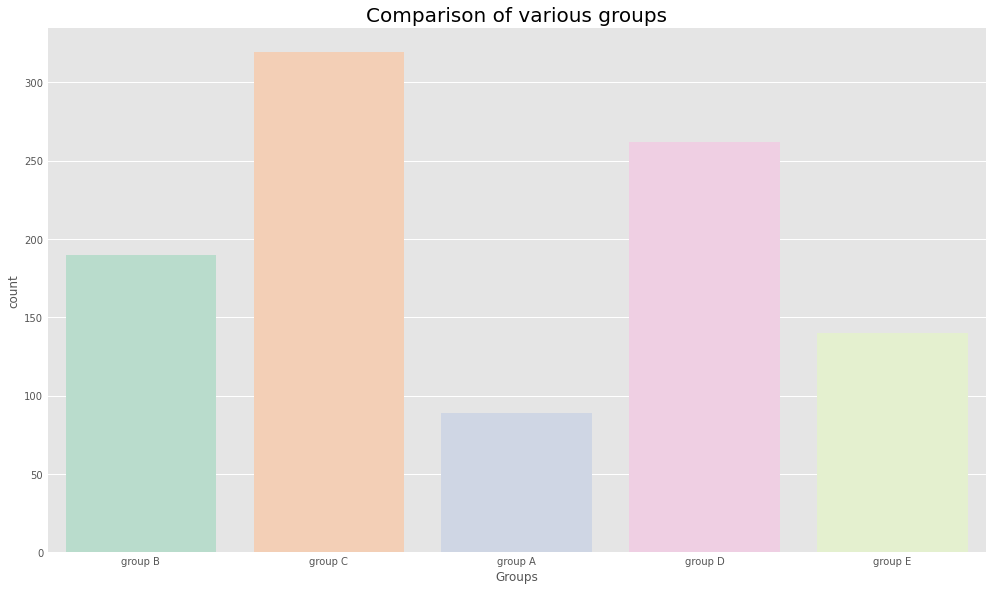

In [17]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

sns.countplot(df['race/ethnicity'], palette = 'Pastel2')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

### Visualizing the different parental education levels

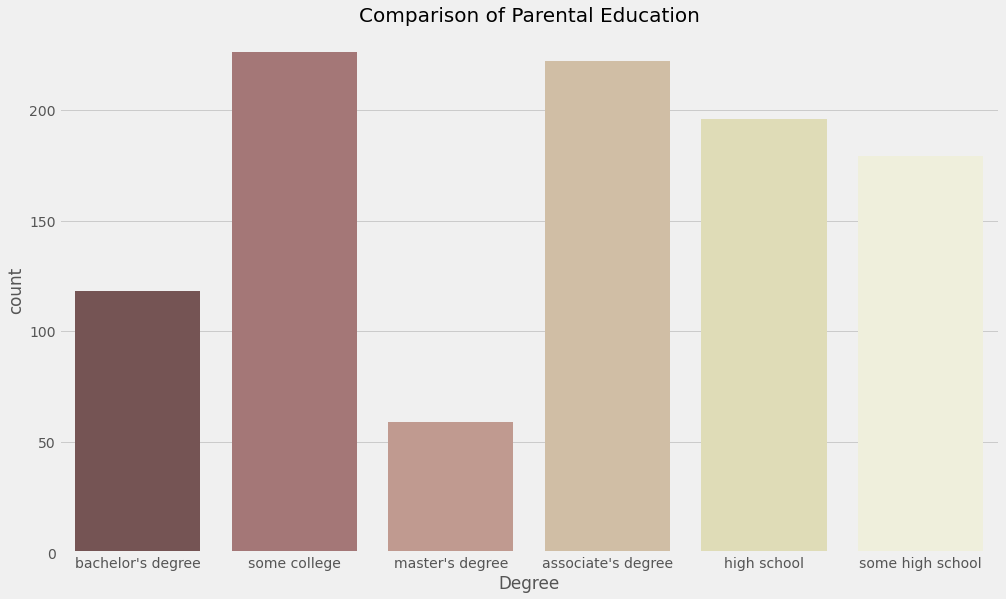

In [18]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(df['parental level of education'], palette = 'pink')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

### Visualizing Maths score

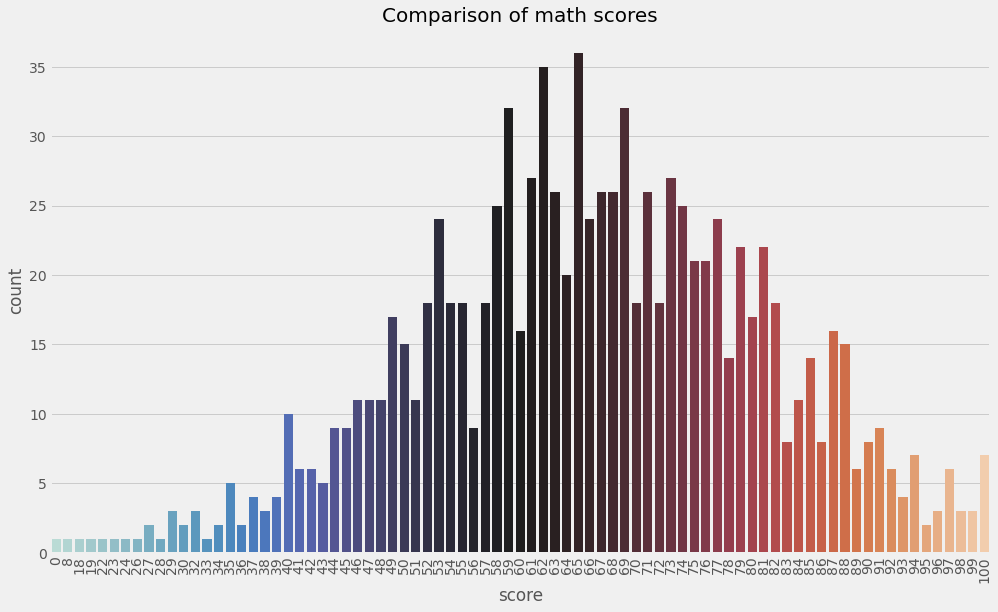

In [19]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(df['math score'], palette = 'icefire')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

### Computing the total score for each student and visualize

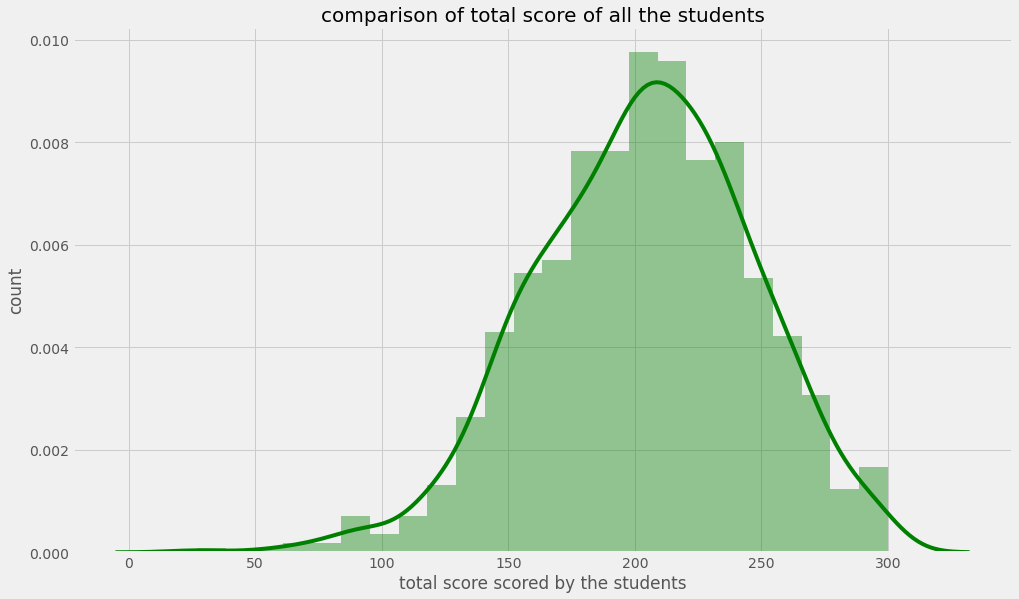

In [20]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

sns.distplot(df['total_score'], color = 'green')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

### Calculation percentage and visualization for each student

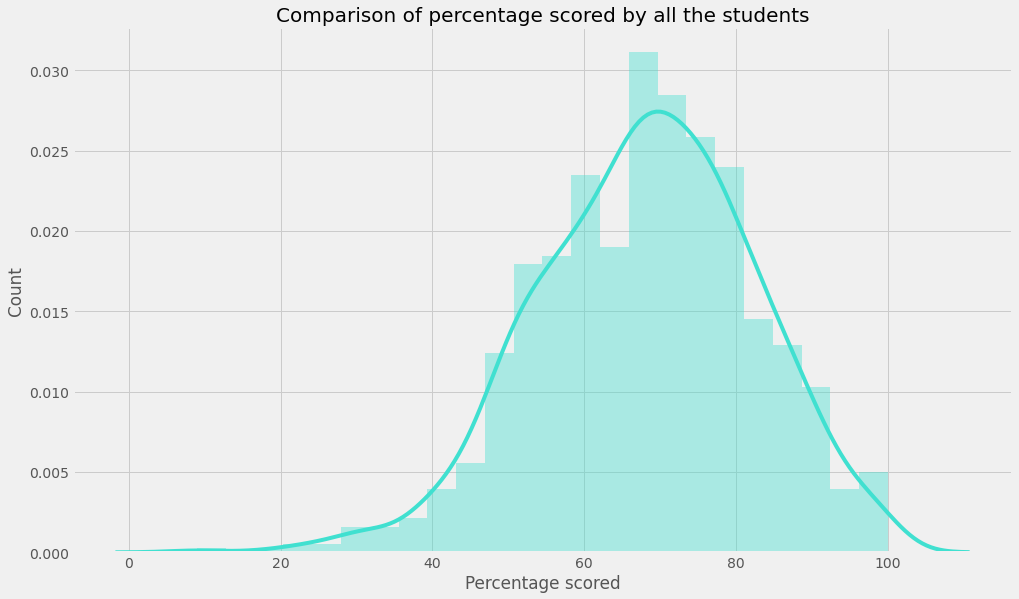

In [21]:
df['percentage'] = df['total_score']/3

for i in range(0, 1000):
    df['percentage'][i] = ceil(df['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(df['percentage'], color = 'turquoise')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

### Assigning grades to the grades according to the following criteria
- 0  - 40 marks : grade E
- 41 - 60 marks : grade D
- 60 - 70 marks : grade C
- 70 - 80 marks : grade B
- 80 - 90 marks : grade A
- 90 - 100 marks : grade O

In [22]:
def passs(x):
    if(x>=40):
        return "pass"
    else:
        return"fail"
    

In [23]:
df['pass_math'] = df.apply(lambda x: passs(x['math score']), axis = 1)

In [24]:
df['pass_reading'] = df.apply(lambda x: passs(x['reading score']), axis = 1)

In [25]:
df['pass_writing'] = df.apply(lambda x: passs(x['writing score']), axis = 1)

In [26]:
def getgrade(percentage):
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

df['grades'] = df.apply(lambda x: getgrade(x['percentage']), axis = 1)

df['grades'].value_counts()

B    260
C    252
D    248
A    156
O     58
E     26
Name: grades, dtype: int64

# Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

### label encoding for test preparation course

In [30]:
df['test preparation course'] = le.fit_transform(df['test preparation course'])

### label encoding for lunch

In [31]:
df['lunch'] = le.fit_transform(df['lunch'])

### label encoding for race/ethnicity

In [32]:
df['race/ethnicity'] = df['race/ethnicity'].replace('group A', 1)
df['race/ethnicity'] = df['race/ethnicity'].replace('group B', 2)
df['race/ethnicity'] = df['race/ethnicity'].replace('group C', 3)
df['race/ethnicity'] = df['race/ethnicity'].replace('group D', 4)
df['race/ethnicity'] = df['race/ethnicity'].replace('group E', 5)

### label encoding for parental level of education

In [33]:
df['parental level of education'] = le.fit_transform(df['parental level of education'])

### label encoding for gender

In [34]:
df['gender'] = le.fit_transform(df['gender'])

### label encoding for pass_math

In [35]:
df['pass_math'] = le.fit_transform(df['pass_math'])

### label encoding for pass_reading

In [36]:
df['pass_reading'] = le.fit_transform(df['pass_reading'])

### label encoding for pass_writing

In [37]:
df['pass_writing'] = le.fit_transform(df['pass_writing'])

# Data Preparation

In [39]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage,pass_math,pass_reading,pass_writing,grades
0,0,2,1,1,1,72,72,74,218,73.0,1,1,1,B
1,0,3,4,1,0,69,90,88,247,83.0,1,1,1,A
2,0,2,3,1,1,90,95,93,278,93.0,1,1,1,O
3,1,1,0,0,1,47,57,44,148,50.0,1,1,1,D
4,1,3,4,1,1,76,78,75,229,77.0,1,1,1,B


### Splitting the dependent and independent variables

In [40]:
x = df.iloc[:,:13]
y = df.iloc[:,13]

print(x.shape)
print(y.shape)

(1000, 13)
(1000,)


### Splitting the data set into training and test sets

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 13)
(750,)
(250, 13)
(250,)


### Scaling independent variables using MinMaxScaler

In [44]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

### Applying principal components analysis

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

pca = PCA(n_components = 2)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

[2.47056500e-01 2.16513355e-01 1.98912941e-01 1.21676795e-01
 9.19255235e-02 6.84836831e-02 3.73407168e-02 1.19969846e-02
 3.14391912e-03 1.93744150e-03 1.00579376e-03 6.34621290e-06
 2.87028469e-33]


# Modelling

### Logistic Regression

In [53]:
from sklearn.linear_model import  LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.38666666666666666
Testing Accuracy : 0.432


### Creating a confusion matrix

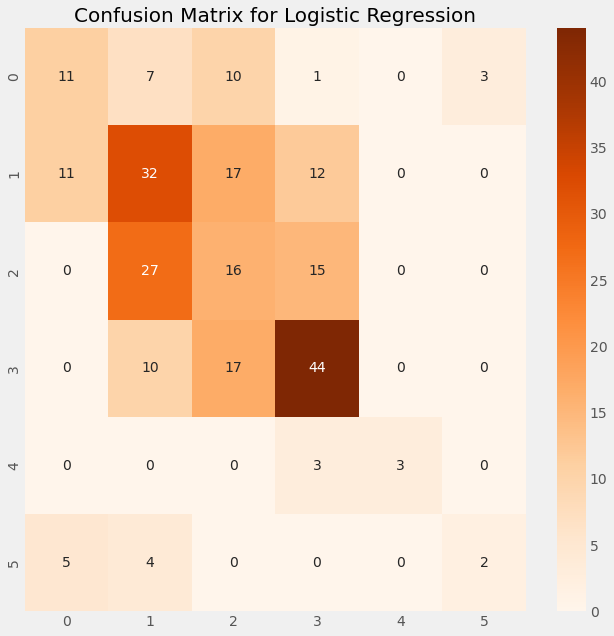

In [71]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (10, 10)
sns.heatmap(cm, annot = True, cmap = 'Oranges')
plt.title('Confusion Matrix for Logistic Regression', fontweight = 30, fontsize = 20)
plt.show()

### Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.756


### Creating a confusion matrix

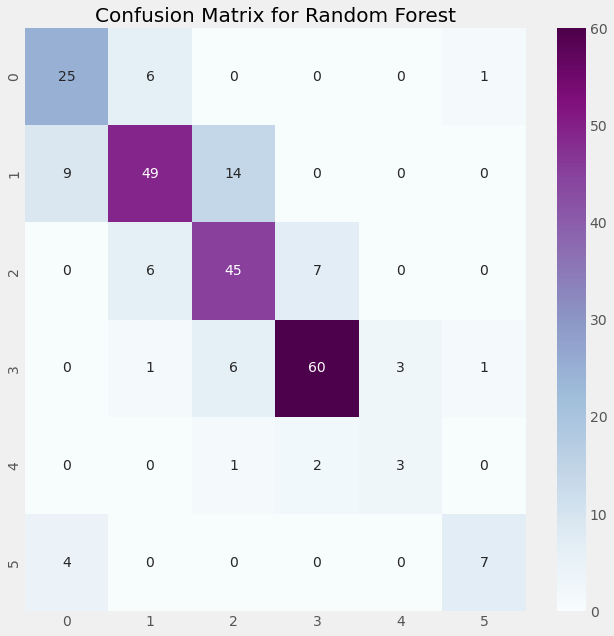

In [91]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (10, 10)
sns.heatmap(cm, annot = True, cmap = 'BuPu')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()

### Radial Visualization for Target

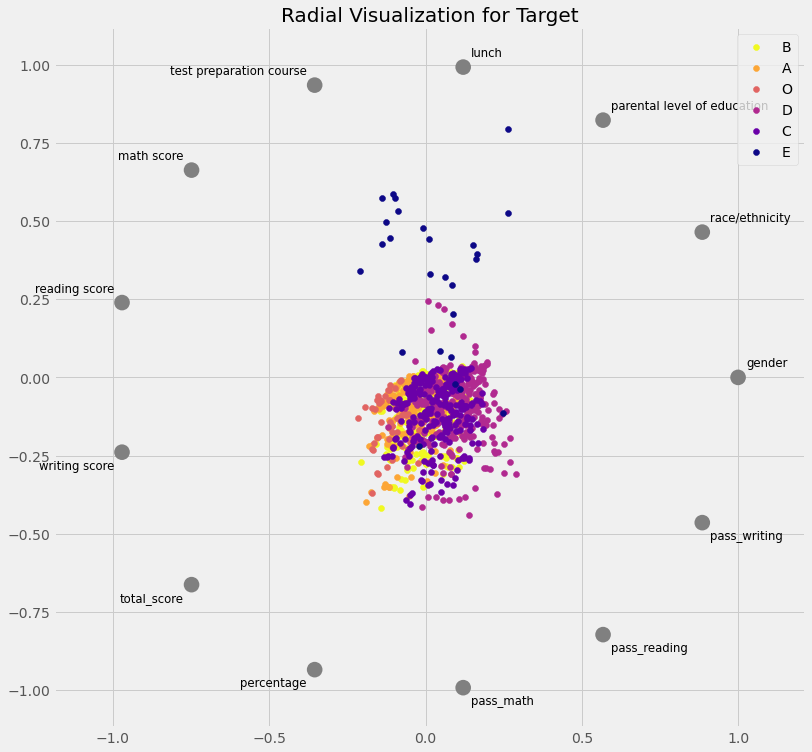

In [110]:
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(12, 12))
new_df = x.copy()
new_df["status"] = y
radviz(new_df, "status", ax=ax, colormap="plasma_r")
plt.title('Radial Visualization for Target', fontsize = 20)
plt.show()

## It gives a clear idea that Students with very low grades are highly correlated with Lunch and Parent Education.